### Model to reassign all true uniques: set coverage

Read individual data

- Geographic level: tract
- Attributes: VOTINGAGE (2) $*$ HISPANIC (2) $*$ CENRACE (63)

In [8]:
import pandas as pd
import numpy as np

filename_hist = 'data/guernsey_hist.csv'
hist = pd.read_csv(filename_hist)

# block to tract
hist['TRACT'] = hist['GEOID10'].astype(str).str[:11]
col_names = hist.columns.to_numpy()
col_names = np.delete(col_names, [0, -1])
hist = hist.groupby('TRACT').sum()[col_names]
hist = hist.reset_index()
hist

,TRACT,00000000,00000001,00000002,00000003,00000004,00000005,00000006,00000007,00000008,...,07010153,07010154,07010155,07010156,07010157,07010158,07010159,07010160,07010161,07010162
0,39059977100,1249.0,16.0,1.0,1.0,0.0,2.0,5.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,39059977200,1025.0,5.0,2.0,3.0,0.0,2.0,6.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39059977300,750.0,36.0,2.0,8.0,1.0,0.0,23.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39059977400,612.0,24.0,1.0,0.0,0.0,1.0,12.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,39059977500,845.0,49.0,6.0,2.0,0.0,2.0,12.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,39059977600,600.0,18.0,0.0,3.0,0.0,1.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,39059977700,747.0,12.0,2.0,4.0,0.0,3.0,6.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,39059977800,916.0,12.0,3.0,0.0,1.0,1.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,39059977900,1075.0,2.0,0.0,1.0,0.0,0.0,8.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,39059978000,972.0,16.0,1.0,1.0,0.0,0.0,10.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# HHGQ (8) $*$ VOTINGAGE (2) $*$ HISPANIC (2) $*$ CENRACE (63) to VOTINGAGE (2) $*$ HISPANIC (2) $*$ RACE (7)
n2, n3, n4 = 2, 2, 63

for y in range(n2):  # voting age
    y = '{number:0{width}d}'.format(width=2, number=y)
    col_names = [col for col in hist.columns if y in col[2:4] and len(col)==8]

    for z in range(n3):  # ethnicity
        z = '{number:0{width}d}'.format(width=2, number=z)
        col_names2 = [col for col in col_names if z in col[4:6]]

        col_two_or_more_races = []
        for x in range(n4):  # race
            if x >= 0 and x <= 5:
                x = '{number:0{width}d}'.format(width=2, number=x)
                col_names3 = [col for col in col_names2 if x in col[6:8]]
                hist[x + y + z] = hist[col_names3].sum(axis=1)
            else:
                x = '{number:0{width}d}'.format(width=2, number=x)
                col_names3 = [col for col in col_names2 if x in col[6:8]]
                col_two_or_more_races.extend(col_names3)
        hist['06' + y + z] = hist[col_two_or_more_races].sum(axis=1)

hist.drop([col for col in hist.columns if len(col)==8], axis=1, inplace=True)
hist            

,TRACT,000000,010000,020000,030000,040000,050000,060000,000001,010001,...,040100,050100,060100,000101,010101,020101,030101,040101,050101,060101
0,39059977100,1249.0,16.0,1.0,1.0,0.0,2.0,15.0,24.0,1.0,...,0.0,0.0,2.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0
1,39059977200,1025.0,5.0,2.0,3.0,0.0,2.0,7.0,12.0,0.0,...,3.0,0.0,2.0,5.0,0.0,3.0,0.0,0.0,3.0,1.0
2,39059977300,751.0,36.0,2.0,8.0,1.0,0.0,33.0,14.0,0.0,...,0.0,2.0,6.0,5.0,0.0,0.0,0.0,0.0,8.0,0.0
3,39059977400,612.0,24.0,1.0,0.0,0.0,1.0,20.0,10.0,0.0,...,1.0,7.0,6.0,7.0,0.0,0.0,0.0,0.0,4.0,0.0
4,39059977500,845.0,49.0,6.0,2.0,0.0,2.0,16.0,9.0,0.0,...,0.0,1.0,2.0,14.0,3.0,2.0,0.0,0.0,3.0,1.0
5,39059977600,606.0,20.0,0.0,3.0,0.0,1.0,13.0,17.0,2.0,...,1.0,1.0,6.0,14.0,2.0,1.0,0.0,0.0,1.0,1.0
6,39059977700,747.0,12.0,2.0,4.0,0.0,3.0,7.0,19.0,0.0,...,0.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0,5.0,0.0
7,39059977800,916.0,12.0,3.0,0.0,1.0,1.0,12.0,10.0,0.0,...,1.0,2.0,2.0,3.0,0.0,1.0,0.0,0.0,3.0,0.0
8,39059977900,1075.0,2.0,0.0,1.0,0.0,0.0,16.0,6.0,0.0,...,0.0,0.0,3.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0
9,39059978000,972.0,17.0,1.0,1.0,0.0,0.0,14.0,10.0,0.0,...,0.0,0.0,4.0,14.0,0.0,2.0,1.0,0.0,3.0,0.0


Aggregated data

In [10]:
# HISPANIC (2) $*$ RACE (7)
n3, n4 = 2, 7

hist2 = hist.copy()
for x in range(n3):  # ethnicity
    x = '{number:0{width}d}'.format(width=2, number=x)
    for y in range(n4):  # race
        y = '{number:0{width}d}'.format(width=2, number=y)
        col_names = [col for col in hist2.columns if x in col[4:6] and y in col[0:2]]
        hist2[y + x] = hist2[col_names].sum(axis=1)

hist2.drop([col for col in hist2.columns if len(col)==6], axis=1, inplace=True)
hist2    

,TRACT,0000,0100,0200,0300,0400,0500,0600,0001,0101,0201,0301,0401,0501,0601
0,39059977100,4455.0,39.0,12.0,5.0,0.0,2.0,17.0,32.0,1.0,1.0,0.0,0.0,2.0,0.0
1,39059977200,4700.0,17.0,10.0,11.0,3.0,2.0,9.0,17.0,0.0,4.0,0.0,0.0,3.0,3.0
2,39059977300,3327.0,118.0,7.0,18.0,1.0,2.0,39.0,19.0,0.0,0.0,0.0,0.0,14.0,4.0
3,39059977400,3384.0,146.0,6.0,11.0,1.0,8.0,26.0,17.0,0.0,0.0,0.0,0.0,6.0,2.0
4,39059977500,3201.0,101.0,13.0,6.0,0.0,3.0,18.0,23.0,3.0,2.0,0.0,0.0,5.0,2.0
5,39059977600,2933.0,57.0,8.0,12.0,1.0,2.0,19.0,31.0,4.0,1.0,0.0,0.0,1.0,1.0
6,39059977700,3681.0,34.0,8.0,23.0,0.0,4.0,9.0,26.0,0.0,0.0,0.0,0.0,5.0,0.0
7,39059977800,3890.0,23.0,12.0,5.0,2.0,3.0,14.0,13.0,0.0,1.0,0.0,0.0,7.0,3.0
8,39059977900,4417.0,7.0,6.0,7.0,0.0,0.0,19.0,8.0,2.0,1.0,0.0,2.0,1.0,0.0
9,39059978000,4288.0,38.0,4.0,11.0,0.0,0.0,18.0,24.0,0.0,4.0,1.0,0.0,6.0,0.0


In [11]:
# RACE (7)
n4 = 7

hist3 = hist.copy()
for y in range(n4):  # race
    y = '{number:0{width}d}'.format(width=2, number=y)
    col_names = [col for col in hist3.columns if y in col[0:2]]
    hist3[y] = hist3[col_names].sum(axis=1)

hist3.drop([col for col in hist3.columns if len(col)==6], axis=1, inplace=True)
hist3    

,TRACT,00,01,02,03,04,05,06
0,39059977100,4487.0,40.0,13.0,5.0,0.0,4.0,17.0
1,39059977200,4717.0,17.0,14.0,11.0,3.0,5.0,12.0
2,39059977300,3346.0,118.0,7.0,18.0,1.0,16.0,43.0
3,39059977400,3401.0,146.0,6.0,11.0,1.0,14.0,28.0
4,39059977500,3224.0,104.0,15.0,6.0,0.0,8.0,20.0
5,39059977600,2964.0,61.0,9.0,12.0,1.0,3.0,20.0
6,39059977700,3707.0,34.0,8.0,23.0,0.0,9.0,9.0
7,39059977800,3903.0,23.0,13.0,5.0,2.0,10.0,17.0
8,39059977900,4425.0,9.0,7.0,7.0,2.0,1.0,19.0
9,39059978000,4312.0,38.0,8.0,12.0,0.0,6.0,18.0


Disclosure risks before protection

In [12]:
import numpy as np

# VOTINGAGE (2) $*$ HISPANIC (2) $*$ RACE (7)
pd.set_option('use_inf_as_na', True)
a = hist.iloc[:,1:].apply(lambda x: 1 / x).to_numpy()
a[~np.isfinite(a)] = 0
print("Identification prob: ", np.sum(a) / a.size)

# HISPANIC (2) $*$ RACE (7)
a = hist2.iloc[:,1:].apply(lambda x: 1 / x).to_numpy()
a[~np.isfinite(a)] = 0
print("Identification prob: ", np.sum(a) / a.size)

# RACE (7)
a = hist3.iloc[:,1:].apply(lambda x: 1 / x).to_numpy()
a[~np.isfinite(a)] = 0
print("Identification prob: ", np.sum(a) / a.size)

Identification prob:  0.21501714260590618
Identification prob:  0.1871756392304641
Identification prob:  0.14190328637663924


In [13]:
import numpy as np

# VOTINGAGE (2) $*$ HISPANIC (2) $*$ RACE (7)
u = hist.iloc[:,1:]
print("Unique prob: ", np.count_nonzero(u == 1) / u.size)
print(np.count_nonzero(u == 1))

# HISPANIC (2) $*$ RACE (7)
u = hist2.iloc[:,1:]
print("Unique prob: ", np.count_nonzero(u == 1) / u.size)
print(np.count_nonzero(u == 1))

# RACE (7)
u = hist3.iloc[:,1:]
print("Unique prob: ", np.count_nonzero(u == 1) / u.size)
print(np.count_nonzero(u == 1))

Unique prob:  0.11428571428571428
32
Unique prob:  0.08571428571428572
12
Unique prob:  0.05714285714285714
4


Model inputs

In [14]:
import numpy as np

# define all the input data for the model
I, K = hist.shape[0], hist.shape[1] - 1
nj = 10
r = 1

V = []
for k in range(1, K+1):
    V.append(hist.index[(hist.iloc[:,k] <= r) & (hist.iloc[:,k] > 0)].tolist())

count = 0
for listElem in V:
    count += len(listElem)  
print(count)

A = hist.iloc[:,1:].to_numpy()
print(A.shape, A[0])

W = np.zeros([I, I, K])
for i in range(I):
    for j in range(I):
        for k in range(K):
            if A[i, k] == 0 or A[j, k] == 0:
                W[i, j, k] = 50
            else:
                W[i, j, k] = 1 / A[i, k] + 1 / A[j, k]
print(W.shape, W[0])            

32
(10, 28) [1.249e+03 1.600e+01 1.000e+00 1.000e+00 0.000e+00 2.000e+00 1.500e+01
 2.400e+01 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 3.206e+03 2.300e+01 1.100e+01 4.000e+00 0.000e+00 0.000e+00 2.000e+00
 8.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00]
(10, 10, 28) [[1.60128102e-03 1.25000000e-01 2.00000000e+00 2.00000000e+00
  5.00000000e+01 1.00000000e+00 1.33333333e-01 8.33333333e-02
  2.00000000e+00 5.00000000e+01 5.00000000e+01 5.00000000e+01
  2.00000000e+00 5.00000000e+01 6.23830318e-04 8.69565217e-02
  1.81818182e-01 5.00000000e-01 5.00000000e+01 5.00000000e+01
  1.00000000e+00 2.50000000e-01 5.00000000e+01 2.00000000e+00
  5.00000000e+01 5.00000000e+01 2.00000000e+00 5.00000000e+01]
 [1.77625027e-03 2.62500000e-01 1.50000000e+00 1.33333333e+00
  5.00000000e+01 1.00000000e+00 2.09523810e-01 1.25000000e-01
  5.00000000e+01 5.00000000e+01 5.00000000e+01 5.00000000e+01
  5.00000000e+01 5.00000000e+01 5.84024003e-04 1.26811594e-01
  2.159

Coverage I: all except the origin and other uniques

In [19]:
# import numpy as np

# ## define coverage aijk
# T = np.ones((I, I, K))

# for i in range(I): 
#     for j in range(I):
#         for k in range(K):
#             if i == j or j in V[k]:
#                 T[i, j, k] = 0
# T   

Coverage II: neighboring

In [20]:
import numpy as np
import geopandas as gpd
from libpysal import weights

filename_gdf = 'data/guernsey_tract10.json'
gdf = gpd.read_file(filename_gdf)
gdf['GEOID10'] = gdf['GEOID10'].astype(str)
wr = weights.distance.KNN.from_dataframe(gdf, k=9)
print(wr.neighbors[0])

## define coverage aijk
T = np.zeros((I, I, K))
for i in wr.neighbors:
    neighbors_idx = wr.neighbors[i]
    for j in neighbors_idx:
        geoid = gdf.loc[[j],'GEOID10'].values[0]
        # idx = hist.loc[hist["TRACT"] == geoid].index[0]
        for k in range(K):
            if j not in V[k]:
                T[i, j, k] = 1
T        

[2, 8, 4, 1, 5, 7, 3, 6, 9]


array([[[0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 0., 1.],
        [1., 1., 0., ..., 1., 1., 1.]],

       [[1., 1., 0., ..., 1., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 0., 1.],
        [1., 1., 0., ..., 1., 1., 1.]],

       [[1., 1., 0., ..., 1., 0., 1.],
        [1., 1., 1., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 0., 1.],
        [1., 1., 0., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 0., ..., 1., 0., 1.],
        [1., 1., 1., ..., 1., 1., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 0., 1.],
        [1., 1., 0., ..., 1., 1.

Run model

In [21]:
import pandas as pd
from gurobipy import Model, GRB, LinExpr, quicksum

# initialize model
m = Model('td')
# m.Params.LogToConsole = 0

# add objective function
obj = LinExpr()

# add decision variables and objective function
theta = {}
for k in range(K):
    if len(V[k]) == 0:
        continue
    for i in V[k]:
        for j in range(I):
            # decision variables
            theta[i, j, k] = m.addVar(vtype=GRB.CONTINUOUS, lb=0, ub=1, name="theta_%d_%d_%d"%(i, j, k))
            # m.update()
            # objective
            obj += theta[i, j, k] * A[i, k] * W[i, j, k]

        # add constraints
        m.addConstr(quicksum(theta[i, j, k] for j in range(I)) == 1)
        m.addConstr(quicksum(T[i, j, k] * theta[i, j, k] for j in range(I)) == 1)

for j in range(I):
    m.addConstr(quicksum(quicksum(theta[i, j, k] * A[i, k] for i in V[k]) for k in range(K)) <= nj)

m.setObjective(obj, GRB.MINIMIZE)

m.update()
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 74 rows, 320 columns and 872 nonzeros
Model fingerprint: 0xfb2c1c22
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve time: 0.00s
Presolved: 74 rows, 320 columns, 872 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3242857e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  3.324285714e+02


In [22]:
# for var in m.getVars():
#     print(var.VarName, var.X)

with open('data/theta/SCM_SP_guernsey.csv', 'w') as f:
    for var in m.getVars():
        f.write(str(var.VarName) + ',' + str(var.X) + '\n')

Error: Original

In [ ]:
import csv
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt  # Graphics

filename_nhgis = 'data/nhgis_ppdd_20210608_tract.csv'
data_nhgis = pd.read_csv(filename_nhgis)
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis['TRACT'] = data_nhgis["gisjoin"].str.slice(8, 14)
data_nhgis['GEOID10'] = data_nhgis[['STATE', 'COUNTY', 'TRACT']].apply(lambda x: ''.join(x), axis=1)
data_nhgis = data_nhgis[(data_nhgis["STATE"] == '39') & (data_nhgis["COUNTY"] == '059')]
# data_nhgis = data_nhgis[['GEOID10', 'H75007_dp', 'H75007_sf']]
# data_nhgis = data_nhgis.loc[(data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']] != 0).any(1)]
data_nhgis.to_csv("data/guernsey_nhgis_tract.csv", index=False)
data_nhgis

,gisjoin,name,state,H72001_dp,H72002_dp,H72003_dp,H72004_dp,H72005_dp,H72006_dp,H72007_dp,...,H80008_sf,H80009_sf,H80010_sf,IFE001_sf,IFE002_sf,IFE003_sf,STATE,COUNTY,TRACT,GEOID10
51795,G3900590977100,Census Tract 9771,39,4607,4564,4531,12,13,5,0,...,0,0,0,2287,1625,662,39,059,977100,39059977100
51796,G3900590977200,Census Tract 9772,39,4823,4765,4724,14,11,11,2,...,0,0,31,2228,1874,354,39,059,977200,39059977200
51797,G3900590977300,Census Tract 9773,39,3629,3513,3360,118,6,17,0,...,0,0,16,1749,1517,232,39,059,977300,39059977300
51798,G3900590977400,Census Tract 9774,39,3673,3578,3389,147,11,13,0,...,0,0,124,1731,1568,163,39,059,977400,39059977400
51799,G3900590977500,Census Tract 9775,39,3440,3358,3223,104,13,10,1,...,0,0,5,1562,1374,188,39,059,977500,39059977500
51800,G3900590977600,Census Tract 9776,39,3128,3064,2970,57,14,15,1,...,0,0,11,1702,1477,225,39,059,977600,39059977600
51801,G3900590977700,Census Tract 9777,39,3810,3773,3715,24,9,18,0,...,0,0,10,1767,1566,201,39,059,977700,39059977700
51802,G3900590977800,Census Tract 9778,39,4000,3950,3910,13,12,6,0,...,0,0,0,2122,1590,532,39,059,977800,39059977800
51803,G3900590977900,Census Tract 9779,39,4516,4447,4424,11,4,7,0,...,0,0,0,2077,1888,189,39,059,977900,39059977900
51804,G3900590978000,Census Tract 9780,39,4459,4370,4334,17,5,13,0,...,0,0,0,1968,1731,237,39,059,978000,39059978000


In [2]:
merged['H75007_sf']

GEOID10
39059977100    11
39059977200     8
39059977300     5
39059977400     5
39059977500     7
39059977600     8
39059977700     6
39059977800     9
39059977900     6
39059978000     3
Name: H75007_sf, dtype: int64

C:\Users\Yue\AppData\Local\Temp\ipykernel_13852\18467622.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids.geometry = gdf.centroid


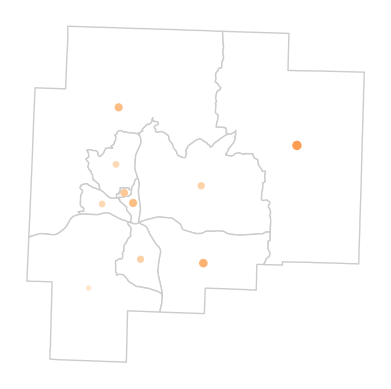

In [5]:
import csv
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt  # Graphics

filename_nhgis = 'data/guernsey_nhgis_tract.csv'
data_nhgis = pd.read_csv(filename_nhgis)
data_nhgis = data_nhgis[['GEOID10', 'H75007_dp', 'H75007_sf']]

filename_gdf = 'data/guernsey_tract10.json'
gdf = gpd.read_file(filename_gdf)

centroids = gdf.copy()
centroids.geometry = gdf.centroid
centroids['GEOID10'] = centroids['GEOID10'].astype(np.int64)
merged = centroids.set_index('GEOID10').join(data_nhgis.set_index('GEOID10'))
merged = merged.sort_index()
merged["original"] = merged['H75007_sf'] * 3 # to get reasonable plotable number

fig = gdf.plot(facecolor='w', edgecolor='0.8', legend=True)
merged.plot(column='original', markersize='original', cmap='Oranges', vmax=25*3, ax=fig)
# fig = merged.plot(column='original', markersize='original', cmap='Oranges', legend=True)
fig.set_axis_off()
fig.get_figure().savefig('plot/error_original_guernsey.eps')

Error: NHGIS

0
0


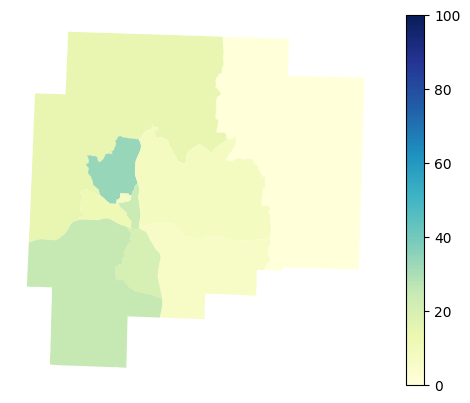

In [15]:
import csv
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt  # Graphics

filename_nhgis = 'data/guernsey_nhgis_tract.csv'
data_nhgis = pd.read_csv(filename_nhgis)
data_nhgis = data_nhgis[['GEOID10', 'H75007_dp', 'H75007_sf']]
print(len(data_nhgis[(data_nhgis['H75007_dp']==1) & (data_nhgis['H75007_sf']==1)]))
print(len(data_nhgis[data_nhgis['H75007_dp']==1]))

filename_gdf = 'data/guernsey_tract10.json'
gdf = gpd.read_file(filename_gdf)
gdf['GEOID10'] = gdf['GEOID10'].astype(np.int64)
merged = gdf.set_index('GEOID10').join(data_nhgis.set_index('GEOID10'))
merged = merged.sort_index()
merged["diff"] = abs(merged["H75007_dp"] - merged["H75007_sf"]) / (merged["H75007_dp"] + merged["H75007_sf"]) * 100

fig = merged.plot(column='diff', legend=True, cmap='YlGnBu', vmin=0, vmax=100)
fig.set_axis_off()
fig.get_figure().savefig('plot/error_nhgis_guernsey.eps')

Error: FA

0
0


C:\Users\Yue\AppData\Local\Temp\ipykernel_16008\789391882.py:46: RuntimeWarning: invalid value encountered in double_scalars
  theta2_fa[i, j, k2] = sum1 / sum2


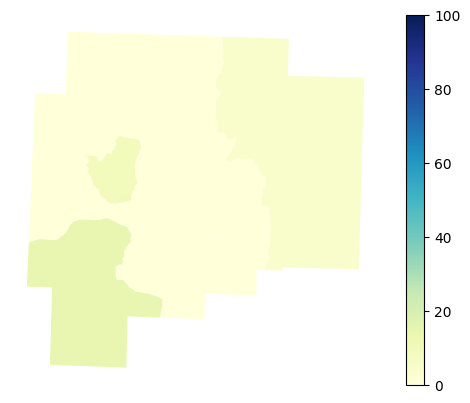

In [16]:
## FA
import csv
import numpy as np
import geopandas as gpd
from libpysal import weights
import esda
import matplotlib.pyplot as plt  # Graphics

filename_gdf = 'data/guernsey_tract10.json'
gdf = gpd.read_file(filename_gdf)
merged_fa = gdf.set_index('GEOID10').join(hist2.set_index('TRACT'))
merged_fa["0101_before"] = merged_fa["0200"]
merged_fa = merged_fa.sort_index()

with open('data/theta/SCM_FA_guernsey.csv', newline='') as f:
    reader = csv.reader(f)
    data_fa = list(reader)

theta_fa = np.zeros([I, I, K])
for k in range(K):
    for i in range(I):
        if i not in V[k] and A[i, k] != 0:
            theta_fa[i, i, k] = 1
for var in data_fa:
    name = var[0].split("_")
    theta_fa[int(name[1]), int(name[2]), int(name[3])] = var[1]

K2 = hist2.shape[1] - 1
Q2 = np.zeros([K2, K])
for idx2, col2 in enumerate(hist2.iloc[:,1:].columns):
    x = col2[0:2]
    y = col2[2:4]
    for idx, col in enumerate(hist.iloc[:,1:].columns):
        if x == col[0:2] and y == col[4:6]:
            Q2[idx2, idx] = 1
        else:
            Q2[idx2, idx] = 0
theta2_fa = np.zeros([I, I, K2])
for k2 in range(K2):
    for i in range(I):
        for j in range(I):
            sum1, sum2 = 0, 0
            for k in range(K):
                sum1 += Q2[k2, k] * theta_fa[i, j, k] * A[i, k]
                sum2 += Q2[k2, k] * A[i, k]
            theta2_fa[i, j, k2] = sum1 / sum2           
theta2_fa[~np.isfinite(theta2_fa)] = 0

A2 = hist2.iloc[:,1:].to_numpy()
A2_fa = np.zeros([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for i in range(I):
            sum += theta2_fa[i, j, k2] * A2[i, k2]
        A2_fa[j, k2] = sum

A2_fa = pd.DataFrame(A2_fa)
A2_fa["TRACT"] = hist2["TRACT"]
merged_fa = merged_fa.join(A2_fa.set_index('TRACT'))
merged_fa["0101_after"] = merged_fa[2]
merged_fa['0101_after'] = merged_fa['0101_after'].fillna(0)
merged_fa = merged_fa.sort_index()
merged_fa["diff"] = abs(merged_fa["0101_after"] - merged_fa["0101_before"]) / (merged_fa["0101_after"] + merged_fa["0101_before"]) * 100
print(len(merged_fa[(merged_fa['0101_after']==1) & (merged_fa['0101_before']==1)]))
print(len(merged_fa[merged_fa['0101_after']==1]))

fig = merged_fa.plot(column='diff', legend=True, cmap='YlGnBu', vmin=0, vmax=100)
fig.set_axis_off()
fig.get_figure().savefig('plot/error_scm_fa_guernsey.eps')

Error: SP

0
0


C:\Users\Yue\AppData\Local\Temp\ipykernel_4836\1941916508.py:47: RuntimeWarning: invalid value encountered in double_scalars
  theta2_sp[i, j, k2] = sum1 / sum2


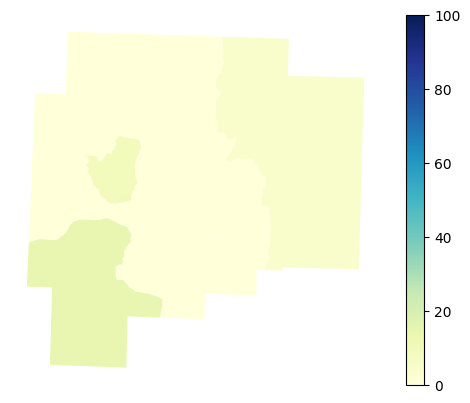

In [12]:
## SP
import csv
import numpy as np
import geopandas as gpd
from libpysal import weights
import esda
import matplotlib.pyplot as plt  # Graphics

filename_gdf = 'data/guernsey_tract10.json'
gdf = gpd.read_file(filename_gdf)
merged_sp = gdf.set_index('GEOID10').join(hist2.set_index('TRACT'))
merged_sp["0101_before"] = merged_sp["0200"]
merged_sp = merged_sp.sort_index()


with open('data/theta/SCM_SP_guernsey.csv', newline='') as f:
    reader = csv.reader(f)
    data_sp = list(reader)

theta_sp = np.zeros([I, I, K])
for k in range(K):
    for i in range(I):
        if i not in V[k] and A[i, k] != 0:
            theta_sp[i, i, k] = 1
for var in data_sp:
    name = var[0].split("_")
    theta_sp[int(name[1]), int(name[2]), int(name[3])] = var[1]

K2 = hist2.shape[1] - 1
Q2 = np.zeros([K2, K])
for idx2, col2 in enumerate(hist2.iloc[:,1:].columns):
    x = col2[0:2]
    y = col2[2:4]
    for idx, col in enumerate(hist.iloc[:,1:].columns):
        if x == col[0:2] and y == col[4:6]:
            Q2[idx2, idx] = 1
        else:
            Q2[idx2, idx] = 0
theta2_sp = np.zeros([I, I, K2])
for k2 in range(K2):
    for i in range(I):
        for j in range(I):
            sum1, sum2 = 0, 0
            for k in range(K):
                sum1 += Q2[k2, k] * theta_sp[i, j, k] * A[i, k]
                sum2 += Q2[k2, k] * A[i, k]
            theta2_sp[i, j, k2] = sum1 / sum2           
theta2_sp[~np.isfinite(theta2_sp)] = 0

A2 = hist2.iloc[:,1:].to_numpy()
A2_sp = np.zeros([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for i in range(I):
            sum += theta2_sp[i, j, k2] * A2[i, k2]
        A2_sp[j, k2] = sum

A2_sp = pd.DataFrame(A2_sp)
A2_sp["TRACT"] = hist2["TRACT"]
merged_sp = merged_sp.join(A2_sp.set_index('TRACT'))
merged_sp["0101_after"] = merged_sp[2]
merged_sp['0101_after'] = merged_sp['0101_after'].fillna(0)
merged_sp = merged_sp.sort_index()
merged_sp["diff"] = abs(merged_sp["0101_after"] - merged_sp["0101_before"]) / (merged_sp["0101_after"] + merged_sp["0101_before"]) * 100
print(len(merged_sp[(merged_sp['0101_after']==1) & (merged_sp['0101_before']==1)]))
print(len(merged_sp[merged_sp['0101_after']==1]))

fig = merged_sp.plot(column='diff', legend=True, cmap='YlGnBu', vmin=0, vmax=100)
fig.set_axis_off()
fig.get_figure().savefig('plot/error_scm_sp_guernsey.eps')

Error: Scatter plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


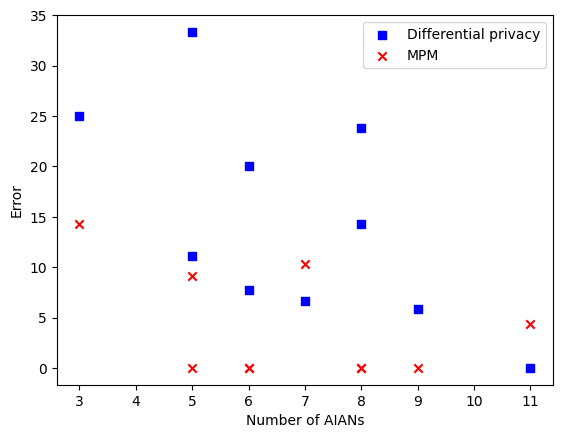

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# merged = merged[['H75007_dp', 'H75007_sf', 'diff']]
# merged = merged.rename(columns={'diff': 'diff_dp'})
# merged_fa = merged_fa[['0101_before', '0101_after', 'diff']]
# merged_fa.index = merged_fa.index.astype(np.int64)
data = merged.join(merged_fa)
plt.scatter(data["H75007_sf"], data["diff_dp"], c='b', marker="s", label='Differential privacy')
plt.scatter(data["H75007_sf"], data["diff"], c='r', marker="x", label='MPM')
plt.legend(loc='upper right')
plt.xlabel("Number of AIANs")
plt.ylabel("Error")
plt.savefig('plot/error_scm_fa_xy_guernsey.eps')

LISA:FA

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


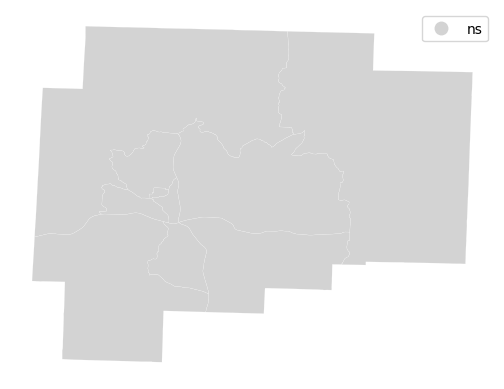

In [33]:
import numpy as np
import geopandas as gpd
from libpysal import weights
import esda
import matplotlib.pyplot as plt  # Graphics
from splot.esda import lisa_cluster

np.random.seed(0)
filename_gdf = 'data/guernsey_tract10.json'
gdf = gpd.read_file(filename_gdf)
merged_fa = gdf.set_index('GEOID10').join(hist2.set_index('TRACT'))
merged_fa["0101_pct_before"] = merged_fa["0200"]/(merged_fa["0000"]+merged_fa["0100"]+merged_fa["0200"]+merged_fa["0300"]+merged_fa["0400"]+merged_fa["0500"]+merged_fa["0600"]+merged_fa["0001"]+merged_fa["0101"]+merged_fa["0201"]+merged_fa["0301"]+merged_fa["0401"]+merged_fa["0501"]+merged_fa["0601"]) * 100
merged_fa = merged_fa.sort_index()

gdf['GEOID10'] = gdf['GEOID10'].astype(str)
w = weights.distance.KNN.from_dataframe(gdf, k=9)
w.transform = 'R'
lisa = esda.moran.Moran_Local(merged_fa["0101_pct_before"], w)
fig = lisa_cluster(lisa, gdf)
plt.savefig('plot/lisa_original_guernsey.eps', format='eps')

C:\Users\Yue\AppData\Local\Temp\ipykernel_21028\2655773990.py:38: RuntimeWarning: invalid value encountered in double_scalars
  theta2_fa[i, j, k2] = sum1 / sum2
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


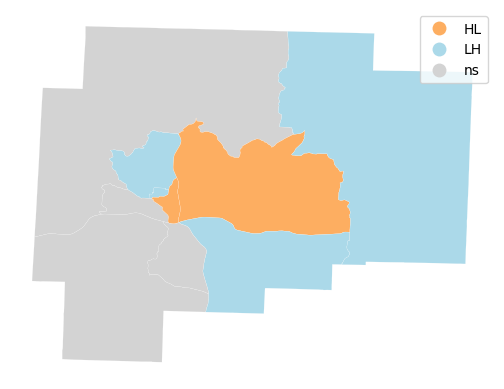

In [34]:
## FA
import csv
import numpy as np
import geopandas as gpd
from splot.esda import lisa_cluster

with open('data/theta/SCM_FA_guernsey.csv', newline='') as f:
    reader = csv.reader(f)
    data_fa = list(reader)

theta_fa = np.zeros([I, I, K])
for k in range(K):
    for i in range(I):
        if i not in V[k] and A[i, k] != 0:
            theta_fa[i, i, k] = 1
for var in data_fa:
    name = var[0].split("_")
    theta_fa[int(name[1]), int(name[2]), int(name[3])] = var[1]

K2 = hist2.shape[1] - 1
Q2 = np.zeros([K2, K])
for idx2, col2 in enumerate(hist2.iloc[:,1:].columns):
    x = col2[0:2]
    y = col2[2:4]
    for idx, col in enumerate(hist.iloc[:,1:].columns):
        if x == col[0:2] and y == col[4:6]:
            Q2[idx2, idx] = 1
        else:
            Q2[idx2, idx] = 0
theta2_fa = np.zeros([I, I, K2])
for k2 in range(K2):
    for i in range(I):
        for j in range(I):
            sum1, sum2 = 0, 0
            for k in range(K):
                sum1 += Q2[k2, k] * theta_fa[i, j, k] * A[i, k]
                sum2 += Q2[k2, k] * A[i, k]
            theta2_fa[i, j, k2] = sum1 / sum2           
theta2_fa[~np.isfinite(theta2_fa)] = 0

A2 = hist2.iloc[:,1:].to_numpy()
A2_fa = np.zeros([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for i in range(I):
            sum += theta2_fa[i, j, k2] * A2[i, k2]
        A2_fa[j, k2] = sum

A2_fa = pd.DataFrame(A2_fa)
A2_fa["TRACT"] = hist2["TRACT"]
merged_fa = merged_fa.join(A2_fa.set_index('TRACT'))
merged_fa["0101_pct_after"] = merged_fa[2]/(merged_fa[0]+merged_fa[1]+merged_fa[2]+merged_fa[3]+merged_fa[4]+merged_fa[5]+merged_fa[6]+merged_fa[7]+merged_fa[8]+merged_fa[9]+merged_fa[10]+merged_fa[11]+merged_fa[12]+merged_fa[13]) * 100
merged_fa['0101_pct_after'] = merged_fa['0101_pct_after'].fillna(0)
merged_fa = merged_fa.sort_index()

gdf['GEOID10'] = gdf['GEOID10'].astype(str)
w = weights.distance.KNN.from_dataframe(gdf, k=9)
w.transform = 'R'
lisa_fa = esda.moran.Moran_Local(merged_fa["0101_pct_after"], w)
fig = lisa_cluster(lisa_fa, gdf)
plt.savefig('plot/lisa_scm_fa_guernsey.eps', format='eps')

LISA: SP

In [35]:
import numpy as np
import geopandas as gpd
from libpysal import weights
import esda
import matplotlib.pyplot as plt  # Graphics
from splot.esda import lisa_cluster

filename_gdf = 'data/guernsey_tract10.json'
gdf = gpd.read_file(filename_gdf)
merged_sp = gdf.set_index('GEOID10').join(hist2.set_index('TRACT'))
merged_sp["0101_pct_before"] = merged_sp["0200"]/(merged_sp["0000"]+merged_sp["0100"]+merged_sp["0200"]+merged_sp["0300"]+merged_sp["0400"]+merged_sp["0500"]+merged_sp["0600"]+merged_sp["0001"]+merged_sp["0101"]+merged_sp["0201"]+merged_sp["0301"]+merged_sp["0401"]+merged_sp["0501"]+merged_sp["0601"]) * 100
merged_sp = merged_sp.sort_index()

gdf['GEOID10'] = gdf['GEOID10'].astype(str)
w = weights.distance.KNN.from_dataframe(gdf, k=9)
w.transform = 'R'
lisa = esda.moran.Moran_Local(merged_sp["0101_pct_before"], w)

C:\Users\Yue\AppData\Local\Temp\ipykernel_21028\1125532234.py:38: RuntimeWarning: invalid value encountered in double_scalars
  theta2_sp[i, j, k2] = sum1 / sum2
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


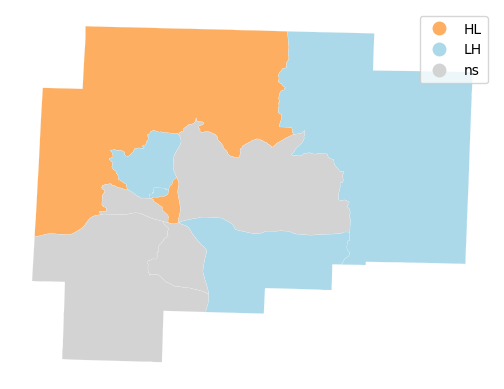

In [36]:
## SP
import csv
import numpy as np
import geopandas as gpd
from splot.esda import lisa_cluster

with open('data/theta/SCM_SP_guernsey.csv', newline='') as f:
    reader = csv.reader(f)
    data_sp = list(reader)

theta_sp = np.zeros([I, I, K])
for k in range(K):
    for i in range(I):
        if i not in V[k] and A[i, k] != 0:
            theta_sp[i, i, k] = 1
for var in data_sp:
    name = var[0].split("_")
    theta_sp[int(name[1]), int(name[2]), int(name[3])] = var[1]

K2 = hist2.shape[1] - 1
Q2 = np.zeros([K2, K])
for idx2, col2 in enumerate(hist2.iloc[:,1:].columns):
    x = col2[0:2]
    y = col2[2:4]
    for idx, col in enumerate(hist.iloc[:,1:].columns):
        if x == col[0:2] and y == col[4:6]:
            Q2[idx2, idx] = 1
        else:
            Q2[idx2, idx] = 0
theta2_sp = np.zeros([I, I, K2])
for k2 in range(K2):
    for i in range(I):
        for j in range(I):
            sum1, sum2 = 0, 0
            for k in range(K):
                sum1 += Q2[k2, k] * theta_sp[i, j, k] * A[i, k]
                sum2 += Q2[k2, k] * A[i, k]
            theta2_sp[i, j, k2] = sum1 / sum2           
theta2_sp[~np.isfinite(theta2_sp)] = 0

A2 = hist2.iloc[:,1:].to_numpy()
A2_sp = np.zeros([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for i in range(I):
            sum += theta2_sp[i, j, k2] * A2[i, k2]
        A2_sp[j, k2] = sum

A2_sp = pd.DataFrame(A2_sp)
A2_sp["TRACT"] = hist2["TRACT"]
merged_sp = merged_sp.join(A2_sp.set_index('TRACT'))
merged_sp["0101_pct_after"] = merged_sp[2]/(merged_sp[0]+merged_sp[1]+merged_sp[2]+merged_sp[3]+merged_sp[4]+merged_sp[5]+merged_sp[6]+merged_sp[7]+merged_sp[8]+merged_sp[9]+merged_sp[10]+merged_sp[11]+merged_sp[12]+merged_sp[13]) * 100
merged_sp['0101_pct_after'] = merged_sp['0101_pct_after'].fillna(0)
merged_sp = merged_sp.sort_index()

gdf['GEOID10'] = gdf['GEOID10'].astype(str)
w = weights.distance.KNN.from_dataframe(gdf, k=9)
w.transform = 'R'
lisa_sp = esda.moran.Moran_Local(merged_sp["0101_pct_after"], w)
fig = lisa_cluster(lisa_sp, gdf)
plt.savefig('plot/lisa_scm_sp_guernsey.eps', format='eps')